<a href="https://colab.research.google.com/github/anishsoni29/NIELIT-Colab/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [4]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

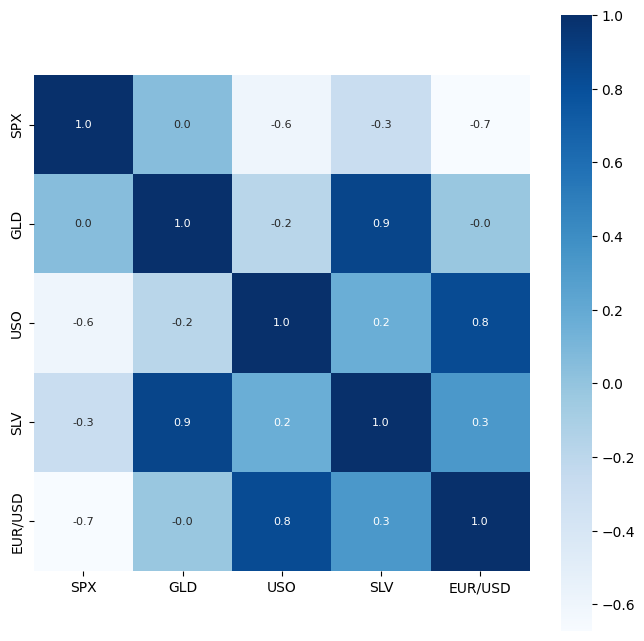

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
#fmt =0.1f is for the round off values
#annot is used to annonate the values in the map

In [17]:
#correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [18]:
#this shows the correlation of gold with the SPX(Stock Price Exchange, US Debt, Silver, and Euro/ USD)

<ipython-input-21-e9d7c3b91201>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color= 'gold')


<Axes: xlabel='GLD', ylabel='Density'>

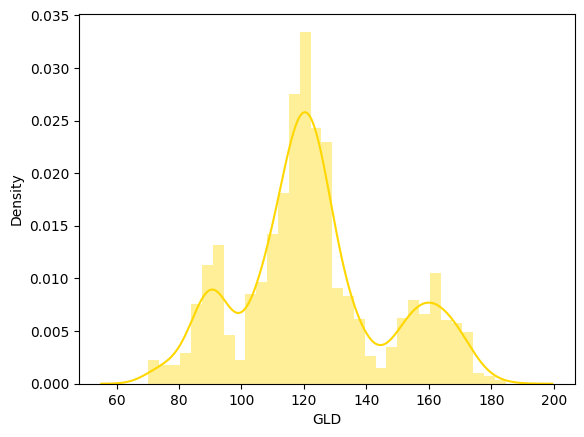

In [21]:
#checking the distribution of GLD Price
sns.distplot(gold_data['GLD'], color= 'gold')

Splitting the features and targets

In [22]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into Training data and Test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=2)

Model Training: Random Forest Regressor

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [29]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.51499927  81.90929998 115.97890035 127.66400061 120.73690146
 154.80639765 150.48799858 126.10200026 117.48579878 125.87410071
 116.64700096 172.70260115 141.7753986  167.89749874 115.13099998
 117.59190064 139.9230034  169.7031008  158.69280295 158.4272002
 155.16770028 125.25720023 175.80220031 156.89680289 125.2283003
  93.89509987  77.23060011 120.6362     119.08319913 167.44709942
  88.288      125.24880028  91.1704006  117.74320014 121.14699915
 136.44350023 115.4698009  115.21550082 146.69039991 107.23910089
 104.39110266  87.19269787 126.59930028 118.12809988 153.17209885
 119.48470041 108.39879982 108.08849793  93.27680059 127.16889756
  74.58210059 113.62279982 121.66930043 111.1970988  118.83369882
 120.51989929 158.56390007 167.61620117 147.43099714  85.84179865
  94.25000043  86.90599844  90.71650014 118.99080067 126.54650048
 127.67220026 168.87059935 122.32339953 117.23709925  98.41470027
 168.30270188 143.18429874 132.26520211 121.29810243 120.93619982
 119.7090005

In [32]:
#R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9893316069215335


Comparision of the Actual and Predicted values in a plot

In [33]:
Y_test = list(Y_test)

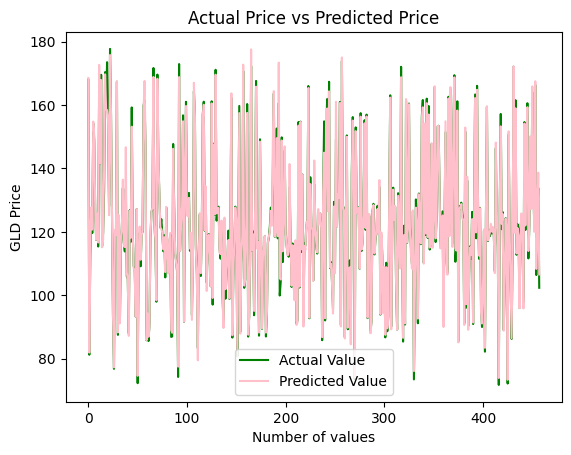

In [34]:
plt.plot(Y_test, color='green', label='Actual Value')
plt.plot(test_data_prediction, color='pink',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [35]:
#This shows that both the actual price and predicted goes hand in hand with a delta of minimum error.